# Import all the necessary modules and packages
    

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# READ THE CSV FILE

In [2]:
df=pd.read_csv("tested.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# ANALYSE THE DATA SET AND MAKE CHANGES

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\cirik\AppData\Local\Temp\ipykernel_16440\684369792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hcorr=df.corr(method="pearson")


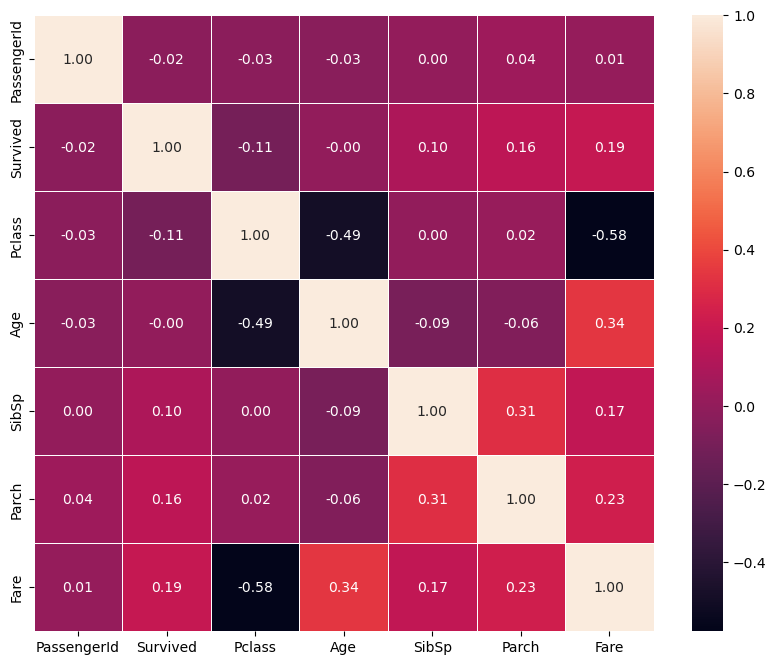

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
hcorr=df.corr(method="pearson")
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(hcorr,annot=True,fmt=".2f", linewidth=.5)
plt.show()
df.info()

In [6]:
print(df.Embarked.value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


# DATA PREPARATION AND CLEANING

In [7]:

df["Age"].fillna(df["Age"].mean(),inplace=True)

# embarked refers to the action of boarding or getting on a vehicle, 
#typically a ship or an aircraft. It indicates the process of getting onto a mode of transportation, 
#usually at the beginning of a journey.
#so it will be helpfull to find a coorealtion in our dataset

df["Embarked"].replace({"S":0,"C":1,"Q":2},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [9]:
# we need to convert Sex into Int as for correlation Sex is best asset
#convert sex values into numericals
df["Sex"].replace({"male":0,"female":1},inplace=True)

# DATA VISUALISATION

C:\Users\cirik\AppData\Local\Temp\ipykernel_16440\2401068076.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hcorr=df.corr(method="pearson")


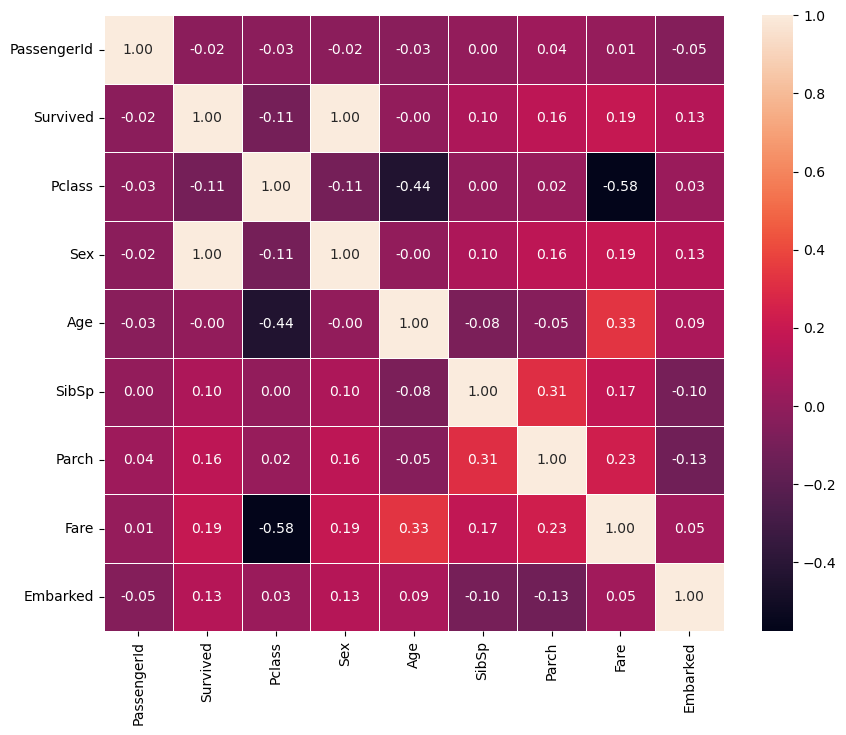

In [10]:
#correlation check

hcorr=df.corr(method="pearson")
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(hcorr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

<Figure size 640x480 with 0 Axes>

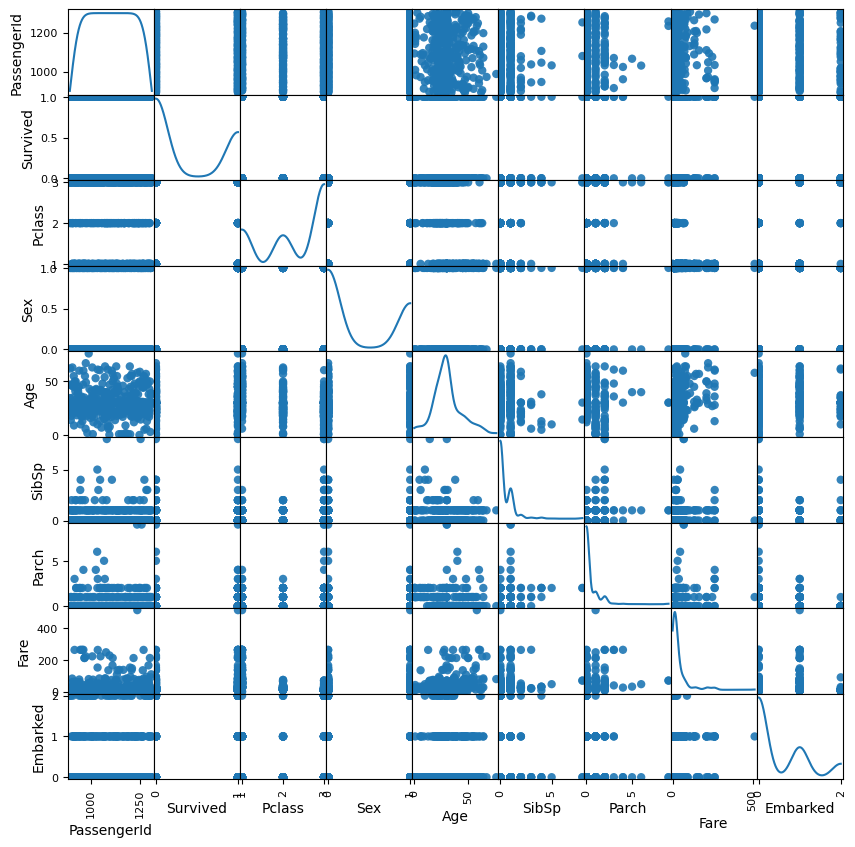

In [11]:
fig=plt.figure()
scatter_matrix(df,figsize=(10,10),alpha=0.9,diagonal="kde",marker="o")
plt.show()

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C105,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,NaN,0


# DATA PREPROCESSING AND MODEL TRAINING

In [13]:
survive_data=df["Survived"]
# Since Ticket, Name and id doesnt have any good purpose in our data set we can remove them
new_data=df.drop(["Ticket","Name","PassengerId","Cabin","Survived"],axis=1)
print("SURVIVE DATA: ",survive_data.head(),"\nNEW DATA: ",new_data.head())
new_data.fillna(df["Fare"].mean(),inplace=True)

SURVIVE DATA:  0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64 
NEW DATA:     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0


In [14]:
x_train,x_test,y_train,y_test=train_test_split(new_data,survive_data,test_size=0.2,random_state=42)
print("x train:",x_train.head(5),"\nx test: ",x_test.head(5),"\ny train: ",y_train.head(5),"\ny test: ",y_test.head(5))

x train:      Pclass  Sex       Age  SibSp  Parch     Fare  Embarked
336       2    0  32.00000      0      0  13.0000         0
31        2    0  24.00000      2      0  31.5000         0
84        2    0  30.27259      0      0  10.7083         2
287       1    0  24.00000      1      0  82.2667         0
317       2    0  19.00000      0      0  10.5000         0 
x test:       Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
321       3    0  25.0      0      0    7.2292         1
324       1    1  39.0      0      0  211.3375         0
388       3    0  21.0      0      0    7.7500         2
56        3    0  35.0      0      0    7.8958         0
153       3    1  36.0      0      2   12.1833         0 
y train:  336    0
31     0
84     0
287    0
317    0
Name: Survived, dtype: int64 
y test:  321    0
324    1
388    0
56     0
153    1
Name: Survived, dtype: int64


USING RANDOM FOREST MODEL

In [15]:
fr= RandomForestClassifier()

# Train the model
fr.fit(x_train, y_train)

#Make predictions on the test set
predictions =fr.predict(x_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


USING LINEAR REGRESSION MODEL

In [16]:
ln=LinearRegression()#create object of linear regression

#test the model
ln.fit(x_train,y_train)
print("intercept is",str(ln.intercept_))
print("coefficient is",str(ln.coef_))

prediction=ln.predict(x_test)
ln.score(x_test,y_test)

intercept is -1.3322676295501878e-15
coefficient is [ 2.51315687e-15  1.00000000e+00 -5.85847523e-17 -1.09498115e-15
  6.70650905e-16 -6.13358499e-17  2.91546955e-16]


1.0

# CROSS VALIDATING

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(fr, x_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores)

[1. 1. 1. 1. 1.]


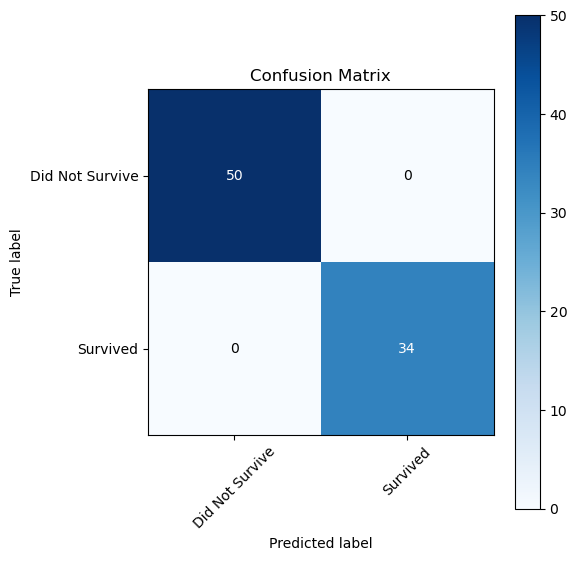

                 precision    recall  f1-score   support

Did Not Survive       1.00      1.00      1.00        50
       Survived       1.00      1.00      1.00        34

       accuracy                           1.00        84
      macro avg       1.00      1.00      1.00        84
   weighted avg       1.00      1.00      1.00        84



In [18]:
cm = confusion_matrix(y_test, predictions)

# Ploting confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

class_names = ['Did Not Survive', 'Survived']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]:.0f}', ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Calculate classification report
report = classification_report(y_test, predictions, target_names=class_names)
print(report)

In [19]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,0,25.0,0,0,7.2292,1
324,1,1,39.0,0,0,211.3375,0
388,3,0,21.0,0,0,7.7500,2
56,3,0,35.0,0,0,7.8958,0
153,3,1,36.0,0,2,12.1833,0
...,...,...,...,...,...,...,...
57,3,0,25.0,0,0,7.6500,0
126,3,0,22.0,0,0,7.7958,0
24,1,1,48.0,1,3,262.3750,1
17,3,0,21.0,0,0,7.2250,1


In [20]:
n_col=x_test.columns
n_col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

# FOR COSTUME TESTING 

In [22]:
data={
    'Pclass':[3],
    'Sex':[0],
    'Age':[34.0],
    'SibSp':[0],
    'Parch':[0],
    'Fare':[7.8292],
    'Embarked':[2]
}
new_test=pd.DataFrame(data)
new_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.0,0,0,7.8292,2


In [23]:
pr=ln.predict(new_test)
pr

array([4.31820469e-15])

In [24]:
int(pr)

0

# INDICATE THE PERSON DIDNT SURVIVE